## Importing the necessary libraries 

In [300]:
import warnings
warnings.filterwarnings ("ignore")

In [301]:
import numpy as np
import pandas as pd

In [302]:
pd.set_option("display.max_rows", 2500) #For displaying maximum rows in output
pd.set_option("display.max_columns", 100) #For displaying maximum columns in output
pd.set_option('display.float_format', lambda x: '%.5f' % x) #For displaying upto 5 decimal places only

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## 1. Reading and understanding the Lead Score data 

In [304]:
lead_df=pd.read_csv("Leads.csv")
lead_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00000,0,0.00000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00000,15.00000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00000,674,2.50000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00000,15.00000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00000,1532,2.00000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00000,20.00000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00000,305,1.00000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00000,17.00000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00000,1428,1.00000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00000,18.00000,No,No,Modified


### 1.1 Looking at basic attributes of the data

In [305]:
lead_df.shape

(9240, 37)

In [306]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00000,9240.00000,9103.00000,9240.00000,9103.00000,5022.00000,5022.00000
mean,617188.43561,0.38539,3.44524,487.69827,2.36282,14.30625,16.34488
std,23405.99570,0.48671,4.85485,548.02147,2.16142,1.38669,1.81140
min,579533.00000,0.00000,0.00000,0.00000,0.00000,7.00000,11.00000
25%,596484.50000,0.00000,1.00000,12.00000,1.00000,14.00000,15.00000
50%,615479.00000,0.00000,3.00000,248.00000,2.00000,14.00000,16.00000
75%,637387.25000,1.00000,5.00000,936.00000,3.00000,15.00000,18.00000
max,660737.00000,1.00000,251.00000,2272.00000,55.00000,18.00000,20.00000


In [307]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 1.1.1 Checking the null values and 'Select' entries

In [308]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [309]:
percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)

Prospect ID                                      0.00000
Lead Number                                      0.00000
Lead Origin                                      0.00000
Lead Source                                      0.39000
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      1.48000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             1.48000
Last Activity                                    1.11000
Country                                         26.63000
Specialization                                  15.56000
How did you hear about X Education              23.89000
What is your current occupation                 29.11000
What matters most to you in choosing a course   29.32000
Search                                           0.00000
Magazine                       

In [310]:
# Check if there are any duplicate values in the dataset

lead_df[lead_df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [311]:
##Picking up specific row
lead_df_select=(lead_df.iloc[8])
lead_df_select

Prospect ID                                      cfa0128c-a0da-4656-9d47-0aa4e67bf690
Lead Number                                                                    660624
Lead Origin                                                   Landing Page Submission
Lead Source                                                            Direct Traffic
Do Not Email                                                                       No
Do Not Call                                                                        No
Converted                                                                           0
TotalVisits                                                                   2.00000
Total Time Spent on Website                                                        71
Page Views Per Visit                                                          2.00000
Last Activity                                                            Email Opened
Country                                               

In [312]:
(lead_df[lead_df == 'Select']).count()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

### 1.2 Data Cleaning

In [313]:
## Replacing 'Select' - in the whole data frame

In [314]:
lead_df=lead_df.replace ('Select', np.nan)

In [315]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00000,0,0.00000,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.00000,15.00000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00000,674,2.50000,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00000,15.00000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00000,1532,2.00000,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00000,20.00000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00000,305,1.00000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.00000,17.00000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00000,1428,1.00000,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.00000,18.00000,No,No,Modified


In [316]:
## Checking the null values again

In [317]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [318]:
percent_missing2 = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing2)

Prospect ID                                      0.00000
Lead Number                                      0.00000
Lead Origin                                      0.00000
Lead Source                                      0.39000
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      1.48000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             1.48000
Last Activity                                    1.11000
Country                                         26.63000
Specialization                                  36.58000
How did you hear about X Education              78.46000
What is your current occupation                 29.11000
What matters most to you in choosing a course   29.32000
Search                                           0.00000
Magazine                       

#### 1.2.1 Dropping columns with more than 30% missing or null values

In [319]:
lead_df1 = lead_df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [320]:
lead_df1.shape

(9240, 27)

In [321]:
# Looking at null value percentage again

In [322]:
percent_missing3 = round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)
print(percent_missing3)

Prospect ID                                      0.00000
Lead Number                                      0.00000
Lead Origin                                      0.00000
Lead Source                                      0.39000
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      1.48000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             1.48000
Last Activity                                    1.11000
Country                                         26.63000
What is your current occupation                 29.11000
What matters most to you in choosing a course   29.32000
Search                                           0.00000
Magazine                                         0.00000
Newspaper Article                                0.00000
X Education Forums             

Observation: The varibales like - 'Country', 'What is your current occupation' and 'What matters most to you in choosing a course' are having highest null values after dropping the columns which had even higher. So to get into details, let's delve into these variables first.

#### 1.2.2 Dealing with remaining Null values (less than 30%) 

###### Country

In [323]:
lead_df1[['Country']].value_counts()

Country             
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Liberia                    1
Russia                     1
Kenya                      1
Indonesia                  1
Sri Lanka             

In [324]:
# As seemingly most entries are from India, let's check the percentage of India as value in the Country column

country_percentage = round(100*len(lead_df1[lead_df1['Country'] == 'India'])/len(lead_df1['Country']),2)
print(country_percentage)

70.26


Observation: As more than 70% of leads are from India, and we have got around 26% missing entries, we would choose to drop the column to avoid any bias in the modelling of the data. As a business case as well, very limited number of entries are available from other countries, so it would not make any significant impact on the conclusion we draw from the model if Country variable is dropped. 

In [325]:
##Dropping 'Country' column
lead_df1 = lead_df1.drop(['Country'], axis=1)

##### What is your current occupation 

In [326]:
lead_df1[['What is your current occupation']].value_counts()

What is your current occupation
Unemployed                         5600
Working Professional                706
Student                             210
Other                                16
Housewife                            10
Businessman                           8
dtype: int64

In [327]:
Occupation_percentage1 = round(100*len(lead_df1[lead_df1['What is your current occupation'] == 'Unemployed'])/len(lead_df1['What is your current occupation']),2)
print(Occupation_percentage1)

60.61


In [328]:
Occupation_percentage2 = round(100*len(lead_df1[lead_df1['What is your current occupation'] == 'Working Professional'])/len(lead_df1['What is your current occupation']),2)
print(Occupation_percentage2)

7.64


Observation: This tells that around 60% of potential leads are 'Unemployed', 7% potential leads are Working professionals, and 29% values are missing - we cannot simply impute missing values with highest occuring value in the column as there would be no logical explaination to it. We would rather create another attribute called 'No Information' to replace missing or null values in the column.  

In [329]:
#Replacing

lead_df1['What is your current occupation'] = lead_df1['What is your current occupation'].replace(np.nan, 'No Information')

##### What matters most to you in choosing a course

In [330]:
lead_df1[['What matters most to you in choosing a course']].value_counts()

What matters most to you in choosing a course
Better Career Prospects                          6528
Flexibility & Convenience                           2
Other                                               1
dtype: int64

In [331]:
## Percentage of highest existing value
mattersmost_percentage = round(100*len(lead_df1[lead_df1['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead_df1['What matters most to you in choosing a course']),2)
print(mattersmost_percentage)

70.65


Observation: More than 70% of potential leads have a reason to take up course for Better Career prospects, and around 29% values are missing, so if we drop this column there will be no business conclusion repercussions and it will be effective for data modelling as well. 

In [332]:
## Dropping the 'What matters most to you in choosing a course' column
lead_df1 = lead_df1.drop(['What matters most to you in choosing a course'], axis=1)

#### 1.2.3 Variables with less than 2% null values

1. Lead Source
2. TotalVisits
3. Page Views Per Visit
4. Last activity

In [333]:
#1. Lead Source
lead_df1["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Observation: As Google dominates the Lead Source, we can eaisly impute the negligible amount of null values with 'Google'. Also there are two separate enteries for Google, one is with lower case. We will replace that as well for ease of analysis. 

In [334]:
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace('google', 'Google')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(np.nan, 'Google')

In [335]:
#2. TotalVisits
lead_df1["TotalVisits"].value_counts()

0.00000      2189
2.00000      1680
3.00000      1306
4.00000      1120
5.00000       783
6.00000       466
1.00000       395
7.00000       309
8.00000       224
9.00000       164
10.00000      114
11.00000       86
13.00000       48
12.00000       45
14.00000       36
16.00000       21
15.00000       18
17.00000       16
18.00000       15
20.00000       12
19.00000        9
21.00000        6
23.00000        6
24.00000        5
25.00000        5
27.00000        5
22.00000        3
29.00000        2
28.00000        2
26.00000        2
141.00000       1
55.00000        1
30.00000        1
43.00000        1
74.00000        1
41.00000        1
54.00000        1
115.00000       1
251.00000       1
32.00000        1
42.00000        1
Name: TotalVisits, dtype: int64

Observation: Calculating the median of TotalVisits woould be ideal, as its a skewed data because the potential customers visiting the website from 2 times to 20 times are quiet higher than the customers visiting more than 20 times.

In [336]:
#Median
lead_df1['TotalVisits'].median()

3.0

Rationale for replacing the null values with Median: Median of the overall data distribution of TotalVisits would be ideal to replace the negligible amount of null values (which is 1.48%).

In [337]:
lead_df1['TotalVisits'] = lead_df1['TotalVisits'].replace(np.nan, lead_df1['TotalVisits'].median())

In [338]:
#3. Page Views Per Visit
lead_df1["Page Views Per Visit"].value_counts()

0.00000     2189
2.00000     1795
3.00000     1196
4.00000      896
1.00000      651
5.00000      517
1.50000      306
6.00000      244
2.50000      241
7.00000      133
3.50000       94
8.00000       86
1.33000       66
1.67000       60
2.33000       59
2.67000       54
9.00000       45
4.50000       43
1.75000       28
3.33000       27
10.00000      25
1.25000       23
5.50000       21
2.25000       19
11.00000      18
3.67000       16
6.50000       13
1.80000       13
2.75000       12
1.40000       11
2.80000        9
14.00000       9
4.33000        9
2.20000        9
2.17000        8
1.60000        8
3.25000        8
2.40000        6
13.00000       6
12.00000       5
1.20000        5
1.83000        4
3.40000        4
2.60000        4
1.43000        4
15.00000       4
1.71000        4
1.78000        3
4.25000        3
16.00000       3
4.75000        3
5.67000        3
1.57000        3
1.38000        3
3.60000        2
1.23000        2
1.56000        2
5.40000        2
2.22000       

Observation: Calculating the median of Page Views Per Visit would again be ideal, as its a skewed data because the potential customers viewing a specific Page per visit from 2 times to seven times is on higher side than the else of the data. 

Rationale for Imputation: Imputation of Null values by median value for this column would be an appropriate measure.  

In [339]:
lead_df1['Page Views Per Visit'] = lead_df1['Page Views Per Visit'].replace(np.nan, lead_df1['Page Views Per Visit'].median())

In [340]:
#4. Last activity

#3. Page Views Per Visit
lead_df1["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Observation: As this data is a very specific about the Last activity noted from the potential lead on the basis of what is observed or known to X education, we would not be able to impute null values in this column with any of the available Last Activity enteries. We would rather create another category "Unknown" for the null values for ease of analysis. 

In [341]:
lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan, 'Unknown')

#### 1.2.4 Checking the Null values again after dropping and imputation

In [342]:
percent_missing4 = round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)
print(percent_missing4)

Prospect ID                                0.00000
Lead Number                                0.00000
Lead Origin                                0.00000
Lead Source                                0.00000
Do Not Email                               0.00000
Do Not Call                                0.00000
Converted                                  0.00000
TotalVisits                                0.00000
Total Time Spent on Website                0.00000
Page Views Per Visit                       0.00000
Last Activity                              0.00000
What is your current occupation            0.00000
Search                                     0.00000
Magazine                                   0.00000
Newspaper Article                          0.00000
X Education Forums                         0.00000
Newspaper                                  0.00000
Digital Advertisement                      0.00000
Through Recommendations                    0.00000
Receive More Updates About Our 

#### 1.2.5 Looking at the Dissenting response of the Potential Leads

Rationale: As per the observation of the data and the data disctionary provided, it is evident that there are huge number of dissenting responses by potential leads in certain specific columns - denoted as 'No'. We must look at any such dissenting or straight measurable parameter which gives an idea about the customer behaviour and the chance for the conversion into a lead. Hence looking at what all columns contains how many clear dissenting messages from customers is quintessential. 

In [343]:
(lead_df[lead_df == 'No']).count()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                     8506
Do Not Call                                      9238
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                           9226
Magazine                                         9240
Newspaper Article           

Observation: The follwing columns contain 100%-99% dissenting response, hence cannot be meaningful in further analysis.
1. Magazine
2. Receive More Updates About Our Courses   
3. Update me on Supply Chain Content 
4. Get updates on DM Content   
5. I agree to pay the amount through cheque 
6. Newspaper Article 
7. X Education Forums
8. Newspaper

Besides this, still there are few columns with high number of 'No', however these 'No' are not dissenting replies. They would be required to analyze the data further. 

In [344]:
## Dropping the above listed 5 columns
lead_df1 = lead_df1.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Newspaper Article', 'X Education Forums', 'Newspaper'], axis=1)

#### 1.2.6 Looking at final shape of the data, post data cleaning

In [345]:
lead_df1.shape

(9240, 17)

## 2. Exploratory analysis

In all plots below - Blue-bar in the bar plot is an indicative of lead conversion and Red-bar is an indicative of lead non-conversion.

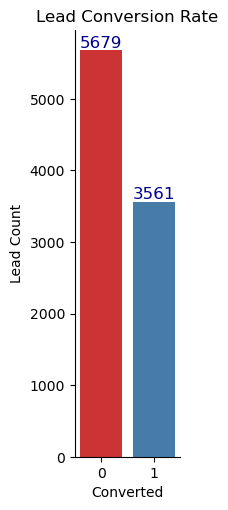

In [346]:
#2.1 Lead Conversion Rate (Overall)

plot = sns.catplot(x="Converted", kind="count", data=lead_df1, palette="Set1", aspect= 0.4);

plt.title('Lead Conversion Rate', fontsize = 12)
plt.xlabel("Converted", fontsize = 10)
plt.ylabel("Lead Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='darkblue', ha='center', va='bottom')
    
plt.show()

In [347]:
## Conversion Rate 
(3561/9240)*100

38.53896103896104

The available data of target variable "Converted" shows the rate of conversion as = 39% approximately. Plot above is the representative of Converted and Not-converted (x-axis) verus Lead counts (y-axis).

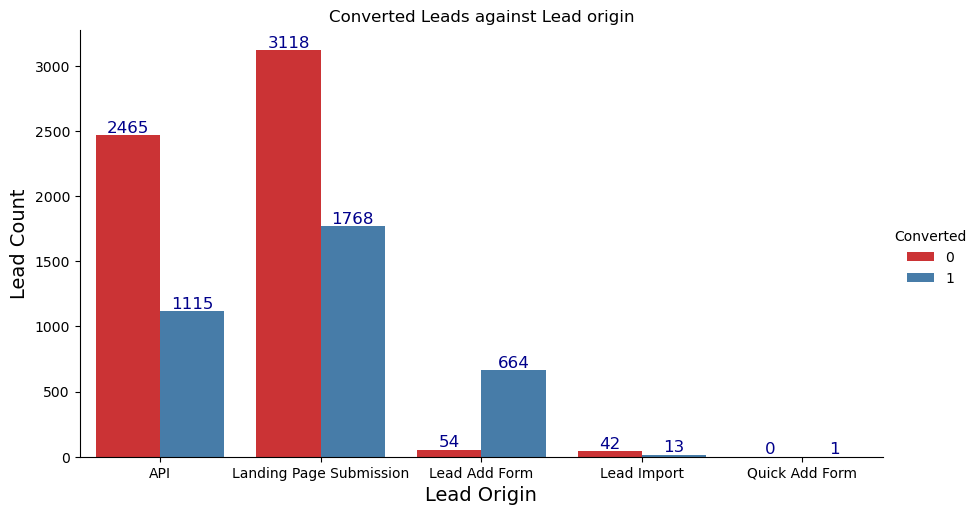

In [348]:
## 2.2 Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect= 1.8);

plt.title('Converted Leads against Lead origin', fontsize = 12)
plt.xlabel("Lead Origin", fontsize = 14)
plt.ylabel("Lead Count", fontsize = 14)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='darkblue', ha='center', va='bottom')
    
plt.show()

Observation: The bar-plot above indicates that the maximum conversion came from the 'Landing Page Submission' followed by 'API', and then trailed by 'Lead Add Form'.

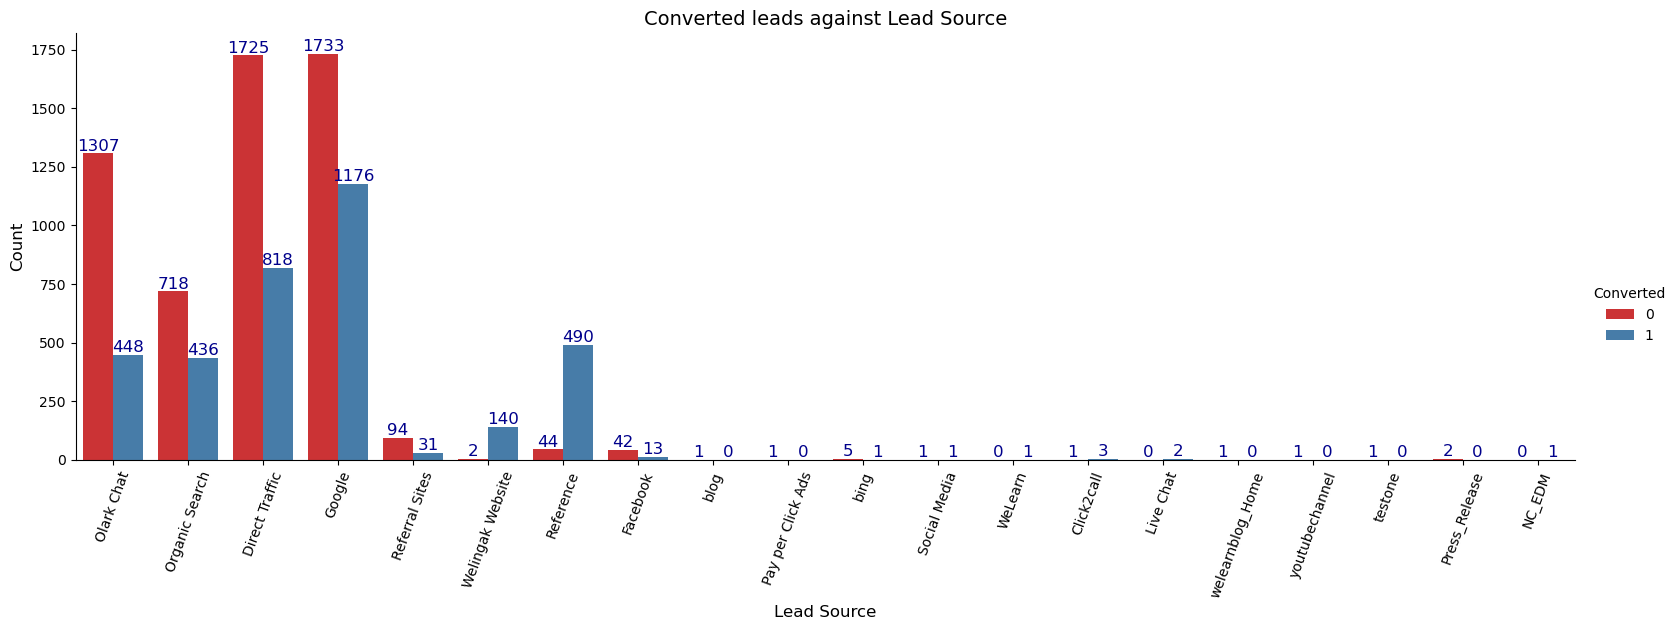

In [349]:
# 2.3 Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect = 3.2);

plt.title('Converted leads against Lead Source', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=70)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='darkblue', ha='center', va='bottom')
   
plt.show()

Observation: Highest conversion came from 'Google', followed by 'Direct Traffic', further trailed by 'References', 'Olark Chat', and 'Organic Search'.

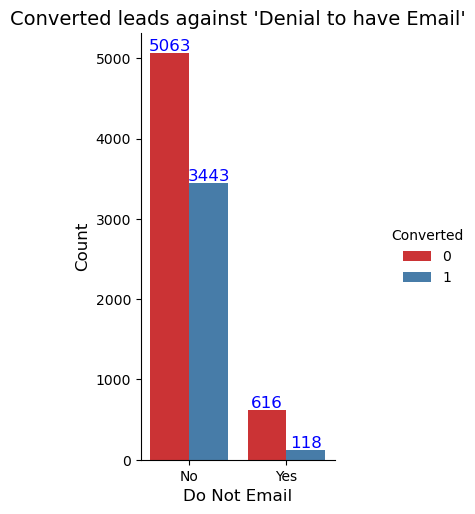

In [350]:
# 2.4 Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect = 0.6);

plt.title("Converted leads against 'Denial to have Email'", fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

In [351]:
# Converted leads who denied to have email
(118/(616+118)*100)

16.076294277929154

Observations: The potential leads who denied to have email from X-education hardly converted to actual leads (still around = 16%). Customers who accepted to have the email were converted in higher numbers.

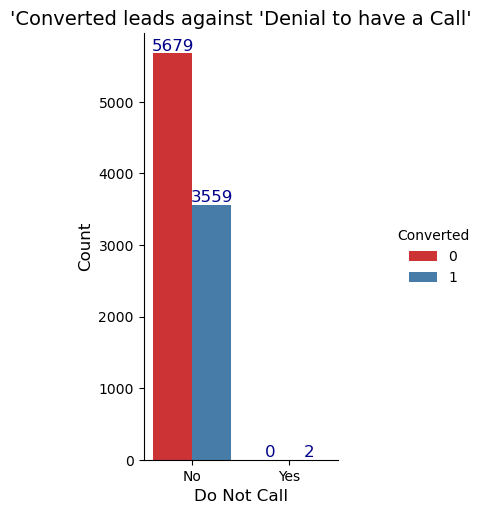

In [352]:
# 2.5 Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect = 0.6);

plt.title("'Converted leads against 'Denial to have a Call'", fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='darkblue', ha='center', va='bottom')

plt.show()

Observation: High number of conversions happened when Customers choose to receive a call from X-education. However, we can see here 2 leads getting converted even when they chose not to get a call. 

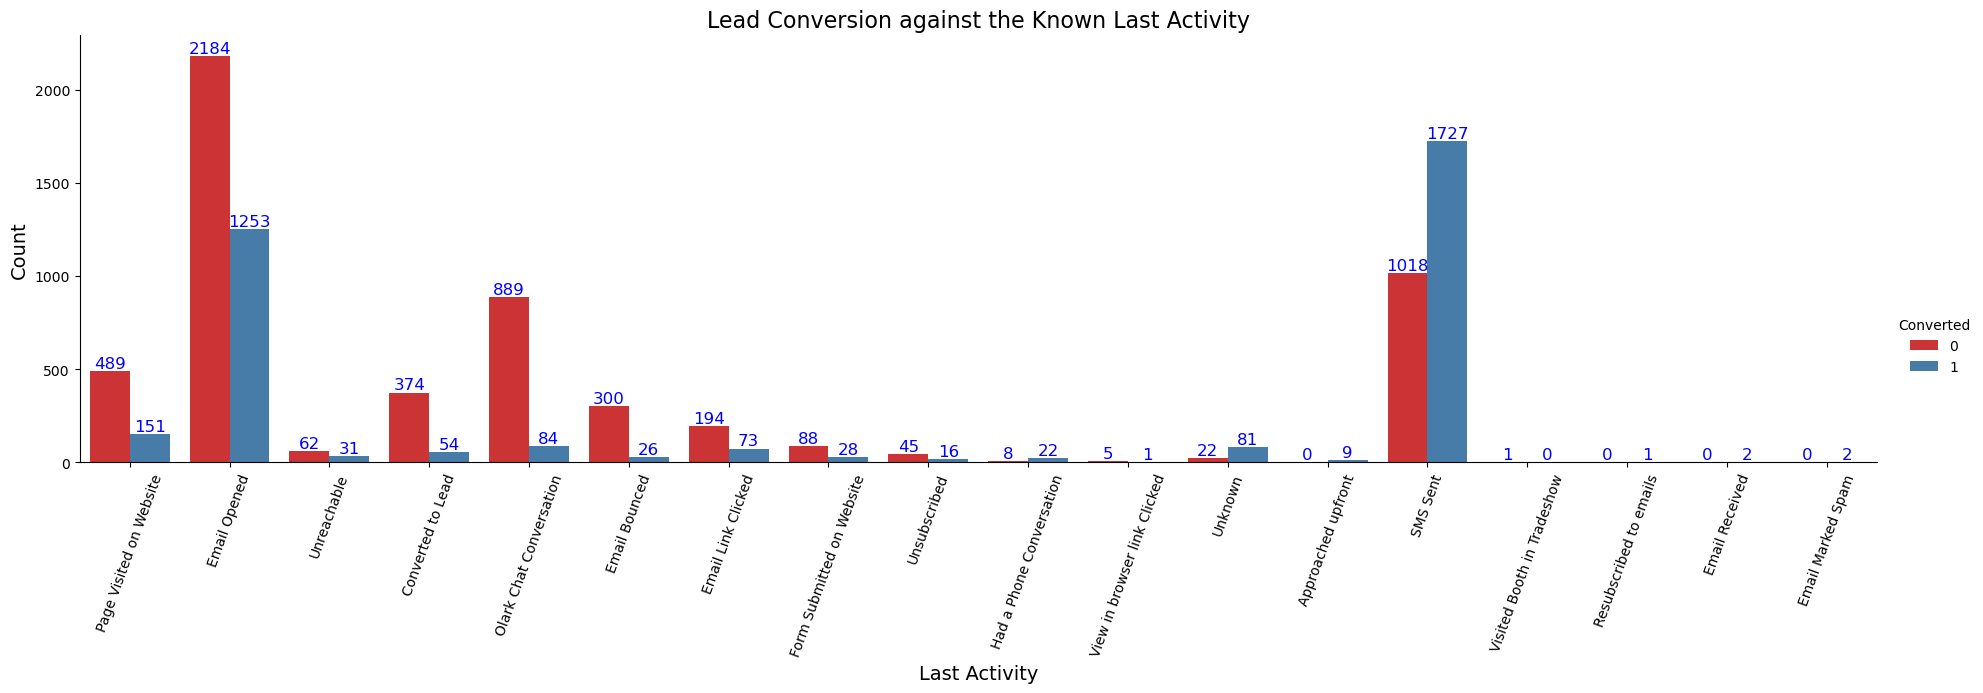

In [353]:
# 2.6 Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect = 3.8);

plt.title('Lead Conversion against the Known Last Activity', fontsize = 16)
plt.xlabel("Last Activity", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation=70)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Observation: It is observed here that when the customers responded last with SMS, that lead to highest conversion, followed by when they opened Email, further trailed by when they responded to Olark Chat and Visited Pages on website.

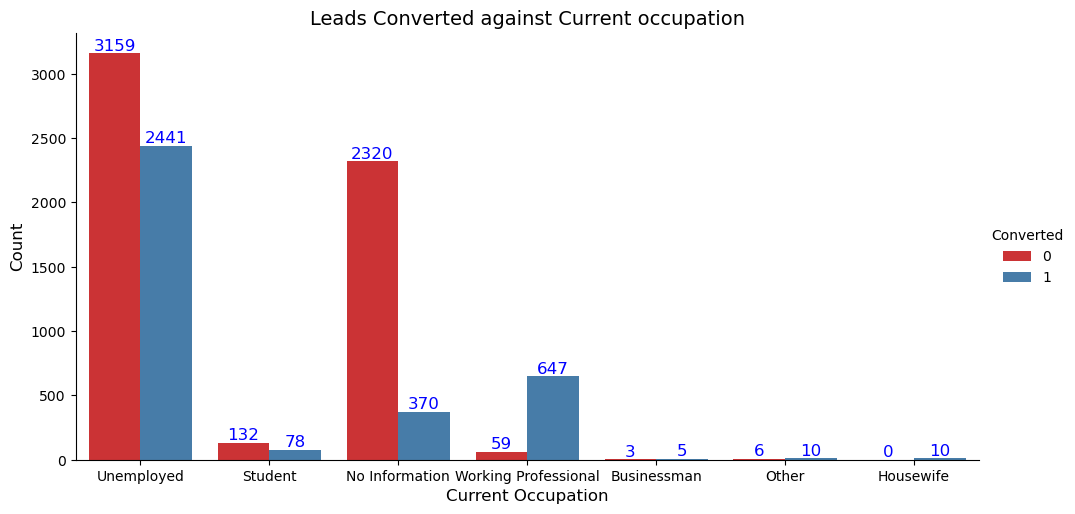

In [354]:
# 2.7 What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_df1, palette="Set1", 
                   aspect = 2.0);

plt.title('Leads Converted against Current occupation', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Observation: Higher number of customers who were unemployed coverted into leads, followed by Working professionals and trailed by people who did not shared the occupation information, followed by students.

Another striking observation is that out of 8 businessman 5 got converted, and 10 housewives approached who got converted at 100% rate. 

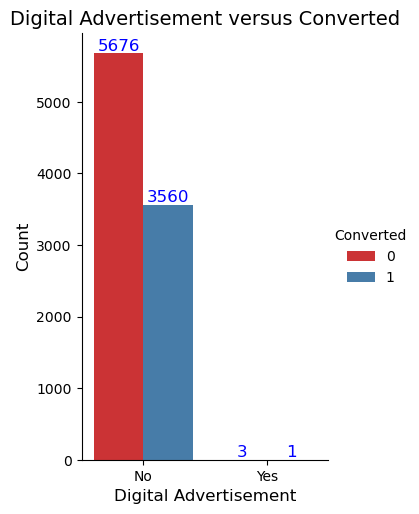

In [355]:
# 2.8 Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect = 0.7);

plt.title('Digital Advertisement versus Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

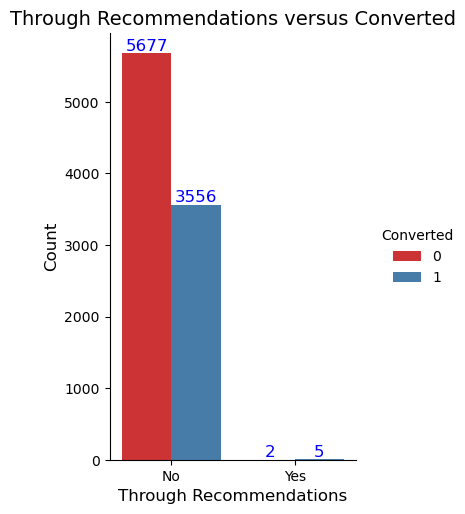

In [356]:
# 2.9 Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_df1, palette="Set1", aspect = 0.7);

plt.title('Through Recommendations versus Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

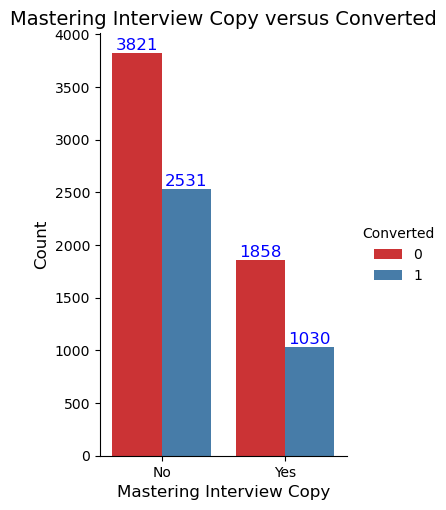

In [357]:
# 2.10 A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_df1, palette="Set1",
                   aspect = 0.7);

plt.title('Mastering Interview Copy versus Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

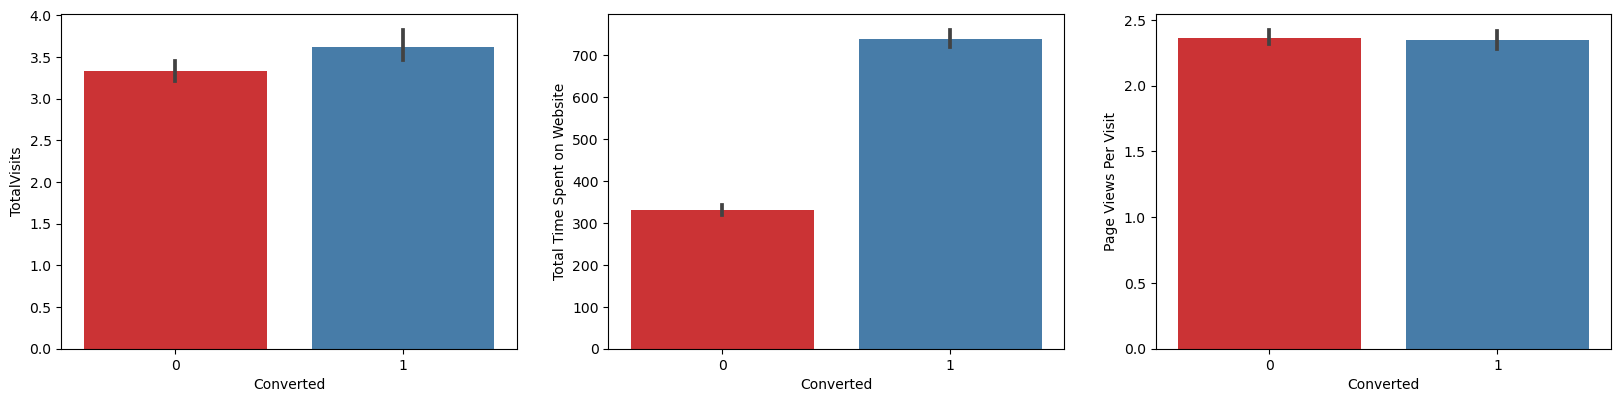

In [358]:
# 2.11 Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = lead_df1)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = lead_df1)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = lead_df1)
plt.show()

In [359]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

### 3. Data Preparation 

#### 3.1 Converting Binary No/Yes variables to 0/1

In [361]:
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({"Yes":1, "No":0})

lead_df1[varlist]=lead_df1[varlist].apply(binary_map)

In [362]:
lead_df1.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.00000,0,0.00000,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.00000,674,2.50000,Email Opened,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.00000,1532,2.00000,Email Opened,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.00000,305,1.00000,Unreachable,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.00000,1428,1.00000,Converted to Lead,Unemployed,0,0,0,0,Modified


In [363]:
lead_df1.shape

(9240, 17)

Many of the categorical variables has 'Select' as one of the entry - which in many of the cases means that the lead has not decided on it currently, or may be the phone call or conversation was so short that the attribute was left empty by the X-education representative.

#### 3.2 Coverting other categorical variables with multiple levels (one-hot coding)

In [364]:
dummy1 = pd.get_dummies(lead_df[["Lead Origin", 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']])
lead_df1=pd.concat([lead_df1, dummy1], axis=1)

In [365]:
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.00000,0,0.00000,Page Visited on Website,Unemployed,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.00000,674,2.50000,Email Opened,Unemployed,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.00000,1532,2.00000,Email Opened,Student,0,0,0,1,Email Opened,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.00000,305,1.00000,Unreachable,Unemployed,0,0,0,0,Modified,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.00000,1428,1.00000,Converted to Lead,Unemployed,0,0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [366]:
lead_df1.shape

(9240, 82)

#### 3.3 Dropping the categorical columns post mapping

In [367]:
lead_df1 = lead_df1.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [368]:
lead_df1.head(10)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.00000,0,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.00000,674,2.50000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.00000,1532,2.00000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.00000,305,1.00000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.00000,1428,1.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0.00000,0,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,1,2.00000,1640,2.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0.00000,0,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,2.00000,71,2.00000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,4.00000,58,4.00000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### 3.3.1 Looking at the info of dataframe after cleaning and ensuring the Dtype are int or float or uint8 for smooth analysis 

In [369]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Do Not Call                                           9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Search                                                9240 non-null   int64  
 7   Digital Advertisement                                 9240 non-null   int64  
 8   Through Recommendations                               9240

In [373]:
lead_df1.shape

(9240, 75)

In [370]:
percent_missing5 = round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)
print(percent_missing5)

Do Not Email                                           0.00000
Do Not Call                                            0.00000
Converted                                              0.00000
TotalVisits                                            0.00000
Total Time Spent on Website                            0.00000
Page Views Per Visit                                   0.00000
Search                                                 0.00000
Digital Advertisement                                  0.00000
Through Recommendations                                0.00000
A free copy of Mastering The Interview                 0.00000
Lead Origin_API                                        0.00000
Lead Origin_Landing Page Submission                    0.00000
Lead Origin_Lead Add Form                              0.00000
Lead Origin_Lead Import                                0.00000
Lead Origin_Quick Add Form                             0.00000
Lead Source_Click2call                                 

### 3.4 Looking at inherent numerical columns for outliers

In [374]:
num_lead_df1 = lead_df1 [['Page Views Per Visit', 'Total Time Spent on Website','TotalVisits']]

In [375]:
num_lead_df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Page Views Per Visit,Total Time Spent on Website,TotalVisits
count,9240.00000,9240.00000,9240.00000
mean,2.35744,487.69827,3.43864
std,2.14578,548.02147,4.81902
min,0.00000,0.00000,0.00000
25%,1.00000,12.00000,1.00000
50%,2.00000,248.00000,3.00000
75%,3.00000,936.00000,5.00000
90%,5.00000,1380.00000,7.00000
95%,6.00000,1562.00000,10.00000
99%,9.00000,1840.61000,17.00000


#### 1.3.1 Looking at Skewness and outliers

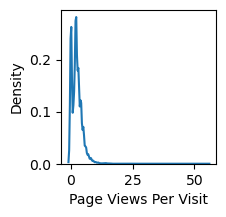

In [376]:
plt.figure(figsize=(2,2))
sns.kdeplot(lead_df1['Page Views Per Visit'])
plt.show()

Observation: The data of Page Views Per Visit is a highly skewed data, hence its relevance in the overall analysis needs to be scrutinized.

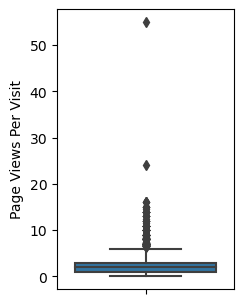

In [377]:
plt.figure(figsize=(16, 8))
plt.subplot(2,6,2)
sns.boxplot(y = 'Page Views Per Visit', data = lead_df1)
plt.show()

Observation: The data of Page Views Per Visit is having huge number of outliers, hence its relevance in the overall analysis needs to be scrutinized.

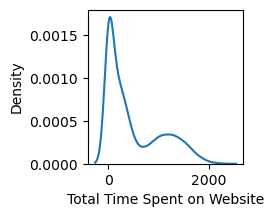

In [378]:
##Looking at Skewness
plt.figure(figsize=(2,2))
sns.kdeplot(lead_df1['Total Time Spent on Website'])
plt.show()

Observation: The data of Total time spent on Website is a highly skewed data, hence its relevance in the overall analysis should be carefully watched.

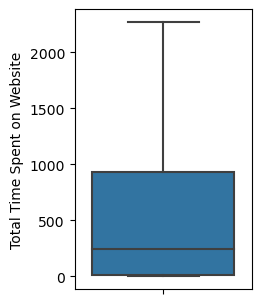

In [379]:
plt.figure(figsize=(16, 8))
plt.subplot(2,6,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead_df1)
plt.show()

Observation: The data of Total Time Spent on Website is a having no outliers, hence no outlier treatment is required. 

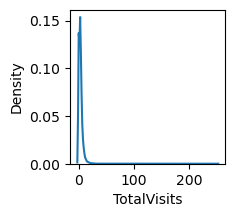

In [380]:
##Looking at Skewness
plt.figure(figsize=(2,2))
sns.kdeplot(lead_df1['TotalVisits'])
plt.show()

Observation: The data of TotalVisits is also skewed, hence its relevance in the overall analysis should be carefully watched.

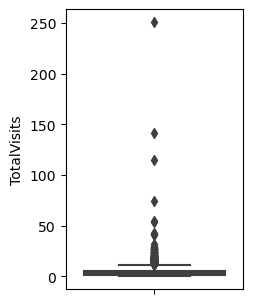

In [381]:
plt.figure(figsize=(16, 8))
plt.subplot(2,6,2)
sns.boxplot(y = 'TotalVisits', data = lead_df1)
plt.show()

Observation: The data of TotalVisits is having outliers, hence its relevance in the overall analysis needs to be scrutinized.

## 4. Data Modelling


### 4.1 Test-train split

In [382]:
#Putting feature variable to X
X= lead_df1.drop(['Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00000,0,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00000,674,2.50000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00000,1532,2.00000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00000,305,1.00000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.00000,1428,1.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [383]:
#Putting response variable to y
y=lead_df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [384]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3)

In [385]:
X_train.shape

(6468, 74)

In [386]:
X_test.shape

(2772, 74)

In [387]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4586,0,0,7.00000,1157,2.33000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3697,0,0,0.00000,0,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8701,0,0,1.00000,594,1.00000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9107,0,0,5.00000,1323,5.00000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1003,0,0,0.00000,0,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### 4.2 Scaling the data

In [390]:
from sklearn.preprocessing import MinMaxScaler

In [391]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4586,0,0,0.02789,0.50924,0.04236,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3697,0,0,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8701,0,0,0.00398,0.26144,0.01818,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9107,0,0,0.01992,0.58231,0.09091,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1003,0,0,0.00000,0.00000,0.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [392]:
#Checking the lead conversion rate (We have seen it above in Exploratory analysis as well)
lead_conversion=(sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100
lead_conversion

38.53896103896104

### 4.3 Data Correlations

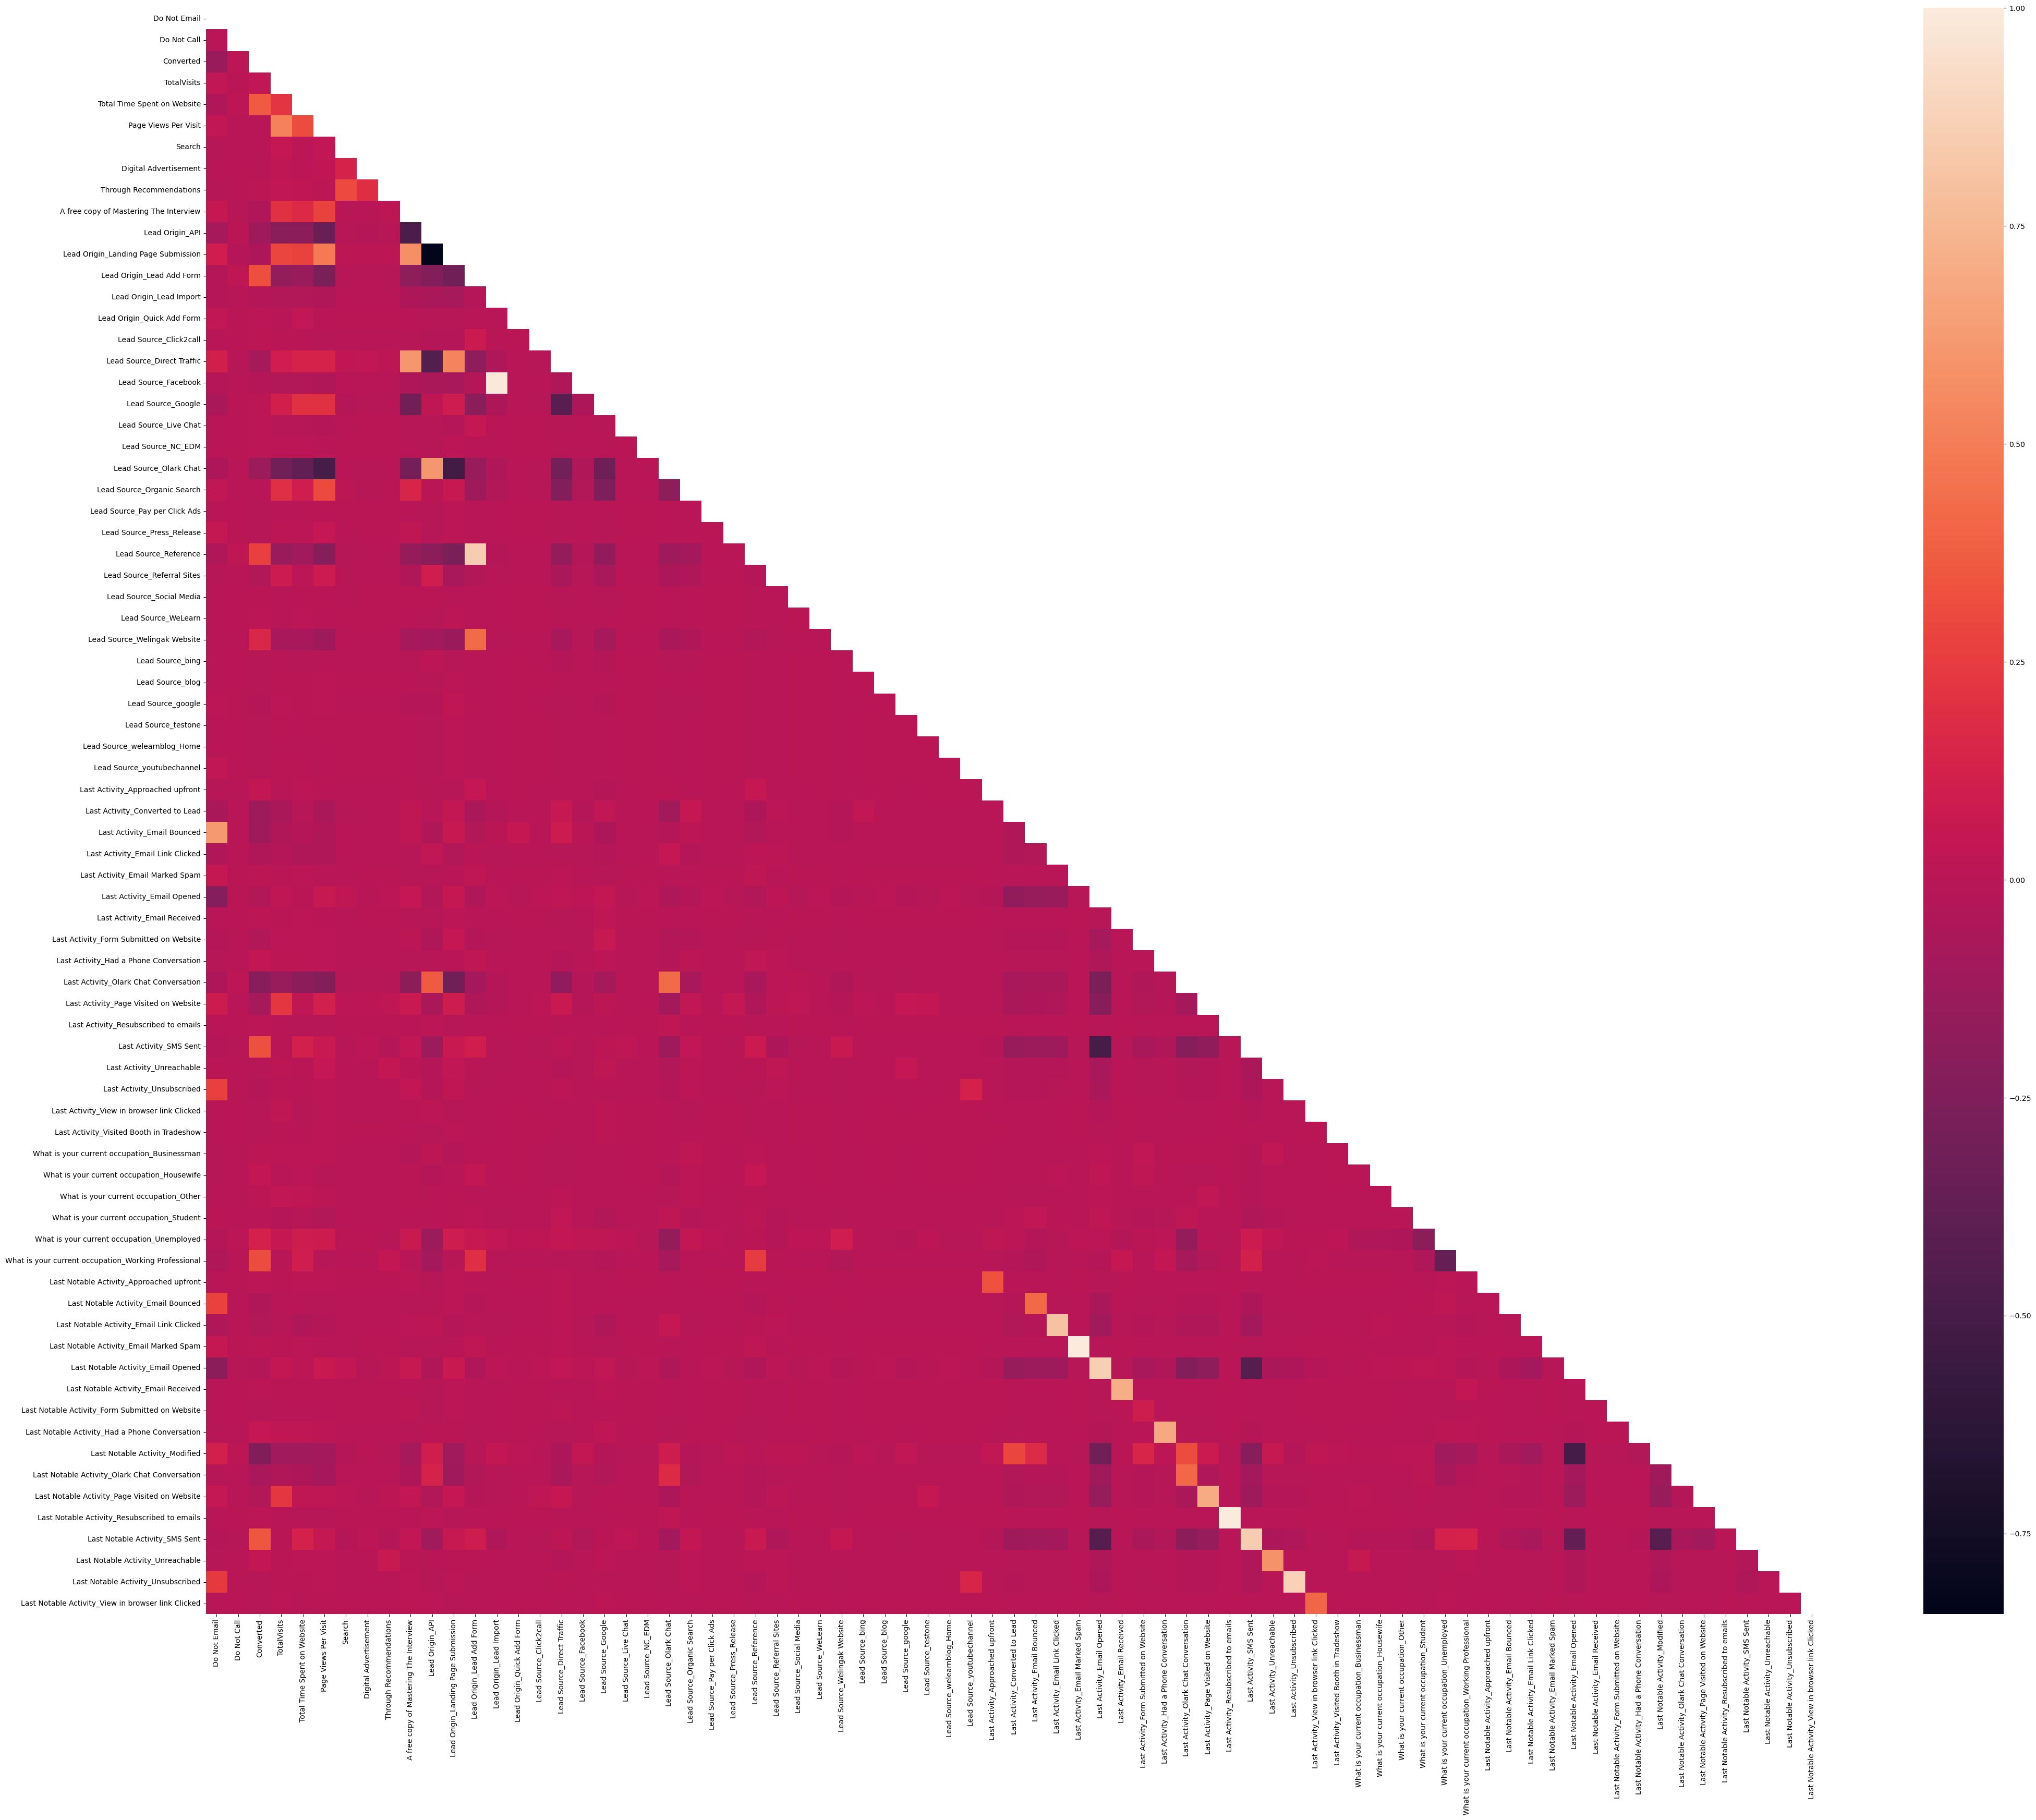

In [399]:
plt.figure(figsize = (50,40)) 
matrix = np.triu(lead_df1.corr())
sns.heatmap (lead_df1.corr(), mask=matrix)
plt.show()

Observations: We won't be able to analyze anything from such a conventrated heatmap data

### 4.4 Model Building

In [401]:
import statsmodels.api as sm

In [402]:
#Logistics Regression Model 
logm1 = sm.GLM (y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6402
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Mar 2023   Deviance:                   1.8329e+05
Time:                        19:37:17   Pearson chi2:                 8.96e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -9.014e+14    2.4e+07  -3.76e+07      0.000   -9.01e+14   -9.01e+14
Do Not Email                                         -6.532e+12   4.29e+06  -1.52e+06      0.000   -6.53e+12   -6.53e+12
Do Not Call                                           2.189e+16   6.72e+07   3.26e+08      0.000    2.19e+16    2.19e+16
TotalVisits                                           7.417e+15    4.9e+07   1.51e+08      0.000    7.42e+15    7.42e+15
Total Time Spent on Website                           3.014e+15      4e+06   7.53e+08      0.000    3.01e+15    3.01e+15
Page Views Per Visit                                  -1.47e+15   3.03e+07  -4.85e+07      0.000   -1.47e+15   -1.47e+15
Search                                               -8.725e+14   2.26e+07  -3.86e+07      0.000   -8.73e+14   -8.73e+14
Digital Advertisement                                -1.842e+16   4.08e+07  -4.52e+08      0.000   -1.84e+16   -1.84e+16
Through Recommendations                               7.024e+14   3.69e+07   1.91e+07      0.000    7.02e+14    7.02e+14
A free copy of Mastering The Interview               -3.911e+14   2.62e+06  -1.49e+08      0.000   -3.91e+14   -3.91e+14
Lead Origin_API                                       -2.06e+15   2.85e+07  -7.23e+07      0.000   -2.06e+15   -2.06e+15
Lead Origin_Landing Page Submission                  -2.155e+15   2.85e+07  -7.57e+07      0.000   -2.15e+15   -2.15e+15
Lead Origin_Lead Add Form                             7.454e+14   2.46e+07   3.03e+07      0.000    7.45e+14    7.45e+14
Lead Origin_Lead Import                               3.691e+13   4.16e+07   8.88e+05      0.000    3.69e+13    3.69e+13
Lead Origin_Quick Add Form                            2.531e+15   5.96e+07   4.25e+07      0.000    2.53e+15    2.53e+15
Lead Source_Click2call                               -1.182e+15   3.65e+07  -3.24e+07      0.000   -1.18e+15   -1.18e+15
Lead Source_Direct Traffic                            7.823e+14    4.3e+07   1.82e+07      0.000    7.82e+14    7.82e+14
Lead Source_Facebook                                  6.673e+14   5.25e+07   1.27e+07      0.000    6.67e+14    6.67e+14
Lead Source_Google                                    6.067e+14   4.29e+07   1.41e+07      0.000    6.07e+14    6.07e+14
Lead Source_Live Chat                                 7.547e+15   4.95e+07   1.52e+08      0.000    7.55e+15    7.55e+15
Lead Source_NC_EDM                                    1.158e+15   7.97e+07   1.45e+07      0.000    1.16e+15    1.16e+15
Lead Source_Olark Chat                                2.866e+15    4.3e+07   6.66e+07      0.000    2.87e+15    2.87e+15
Lead Source_Organic Search                            7.05

### 4.5 RFE

In [409]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [412]:
# running RFE with 17 variables as output

rfe = RFE(logreg)            
rfe = rfe.fit(X_train, y_train)

In [413]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False])

In [414]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 10),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 19),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Click2call', False, 6),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 24),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False,

In [415]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Digital Advertisement', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is

### 4.6 Rebuilding the model

In [416]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Mar 2023   Deviance:                   1.5602e+05
Time:                        20:02:00   Pearson chi2:                 7.63e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  5.64e+15   6.77e+07   8.33e+07      0.000    5.64e+15    5.64e+15
Do Not Email                                         -7.089e+14   4.25e+06  -1.67e+08      0.000   -7.09e+14   -7.09e+14
TotalVisits                                           3.124e+15   4.84e+07   6.45e+07      0.000    3.12e+15    3.12e+15
Total Time Spent on Website                           2.646e+14   3.94e+06   6.72e+07      0.000    2.65e+14    2.65e+14
Page Views Per Visit                                  3.903e+14   2.95e+07   1.32e+07      0.000     3.9e+14     3.9e+14
Digital Advertisement                                -4.514e+15   3.88e+07  -1.16e+08      0.000   -4.51e+15   -4.51e+15
Lead Origin_API                                      -5.838e+15   6.74e+07  -8.67e+07      0.000   -5.84e+15   -5.84e+15
Lead Origin_Landing Page Submission                   -5.94e+15   6.73e+07  -8.82e+07      0.000   -5.94e+15   -5.94e+15
Lead Origin_Lead Add Form                            -4.502e+15   6.75e+07  -6.67e+07      0.000    -4.5e+15    -4.5e+15
Lead Origin_Lead Import                              -5.275e+15   8.26e+07  -6.38e+07      0.000   -5.27e+15   -5.27e+15
Lead Source_Direct Traffic                             1.49e+13   2.26e+06   6.61e+06      0.000    1.49e+13    1.49e+13
Lead Source_Facebook                                 -1.069e+15   4.79e+07  -2.23e+07      0.000   -1.07e+15   -1.07e+15
Lead Source_NC_EDM                                    5.541e+15   6.72e+07   8.25e+07      0.000    5.54e+15    5.54e+15
Lead Source_Olark Chat                                1.158e+15   3.26e+06   3.55e+08      0.000    1.16e+15    1.16e+15
Lead Source_Social Media                              1.261e+15   4.75e+07   2.65e+07      0.000    1.26e+15    1.26e+15
Lead Source_Welingak Website                         -5.719e+13   7.59e+06  -7.54e+06      0.000   -5.72e+13   -5.72e+13
Last Activity_Approached upfront                      3.145e+15   3.03e+07   1.04e+08      0.000    3.15e+15    3.15e+15
Last Activity_Converted to Lead                      -3.249e+14    5.8e+06  -5.61e+07      0.000   -3.25e+14   -3.25e+14
Last Activity_Email Bounced                          -2.389e+14   7.23e+06   -3.3e+07      0.000   -2.39e+14   -2.39e+14
Last Activity_Email Opened                            3.861e+13   5.23e+06   7.38e+06      0.000    3.86e+13    3.86e+13
Last Activity_Olark Chat Conversation                -6.664e+14   5.25e+06  -1.27e+08      0.000   -6.66e+14   -6.66e+14
Last Activity_Page Visited on Website                -5.838e+14   5.51e+06  -1.06e+08      0.000   -5.84e+14   -5.84e+14
Last Activity_Resubscribed to emails                 -4.79

In [417]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Last Activity_Resubscribed to emails,inf
35,Last Notable Activity_Resubscribed to emails,inf
6,Lead Origin_Landing Page Submission,28.03000
8,Lead Origin_Lead Import,20.63000
5,Lead Origin_API,20.38000
10,Lead Source_Facebook,20.35000
18,Last Activity_Email Opened,14.61000
22,Last Activity_SMS Sent,10.53000
31,Last Notable Activity_Email Opened,10.06000
33,Last Notable Activity_Modified,5.16000


In [421]:
col = col.drop('Last Activity_Resubscribed to emails', 1)
col = col.drop('Lead Source_Facebook', 1)
col = col.drop('Last Notable Activity_Resubscribed to emails',1) 
col = col.drop('Lead Origin_Landing Page Submission',1) 
col = col.drop('Lead Origin_Lead Import', 1)
col = col.drop('Lead Origin_API', 1)
col = col.drop('Last Activity_Email Opened', 1)
col = col.drop('Last Activity_SMS Sent', 1)
col = col.drop('Last Notable Activity_Email Opened',1)
col = col.drop('Last Notable Activity_Modified',1)

In [423]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.2
Date:                Sun, 19 Mar 2023   Deviance:                       5478.3
Time:                        20:18:08   Pearson chi2:                 7.23e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5366      0.121    -21.031      0.000      -2.773      -2.300
Do Not Email                                            -0.8215      0.196     -4.200      0.000      -1.205      -0.438
TotalVisits                                              8.7962      2.471      3.559      0.000       3.953      13.640
Total Time Spent on Website                              4.4778      0.163     27.465      0.000       4.158       4.797
Page Views Per Visit                                    -3.7744      1.260     -2.995      0.003      -6.244      -1.305
Digital Advertisement                                  -21.9898   4.55e+04     -0.000      1.000   -8.93e+04    8.92e+04
Lead Origin_Lead Add Form                                3.1446      0.212     14.863      0.000       2.730       3.559
Lead Source_Direct Traffic                              -0.3255      0.081     -4.021      0.000      -0.484      -0.167
Lead Source_NC_EDM                                      24.1426   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   1.0889      0.123      8.874      0.000       0.848       1.329
Lead Source_Social Media                                 1.8028      1.462      1.233      0.217      -1.062       4.668
Lead Source_Welingak Website                             2.2235      0.748      2.971      0.003       0.756       3.691
Last Activity_Approached upfront                        22.1055   2.89e+04      0.001      0.999   -5.66e+04    5.66e+04
Last Activity_Converted to Lead                         -1.8853      0.223     -8.467      0.000      -2.322      -1.449
Last Activity_Email Bounced                             -1.9128      0.358     -5.349      0.000      -2.614      -1.212
Last Activity_Olark Chat Conversation                   -1.7942      0.175    -10.272      0.000      -2.137      -1.452
Last Activity_Page Visited on Website                   -1.2000      0.156     -7.715      0.000      -1.505      -0.895
Last Activity_Unsubscribed                              -0.2213      0.489     -0.453      0.651      -1.179       0.737
What is your current occupation_Businessman              1.7333      1.040      1.667      0.096      -0.305       3.771
What is your current occupation_Housewife               24.2333   2.32e+04      0.001      0.999   -4.55e+04    4.56e+04
What is your current occupation_Other                    1.9047      0.749      2.542      0.011       0.436       3.373
What is your current occupation_Student                  1.0978      0.231      4.751      0.000       0.645       1.551
What is your current occupation_Unemployed               1

In [424]:
col = col.drop('Digital Advertisement', 1)
col = col.drop('Lead Source_NC_EDM',1) 
col = col.drop('Lead Source_Social Media',1) 
col = col.drop('Last Activity_Approached upfront', 1)
col = col.drop('Last Activity_Unsubscribed', 1)
col = col.drop('What is your current occupation_Housewife', 1)
col = col.drop('What is your current occupation_Other', 1)
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col = col.drop('Last Notable Activity_Olark Chat Conversation', 1)

In [425]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.2
Date:                Sun, 19 Mar 2023   Deviance:                       5524.4
Time:                        20:29:23   Pearson chi2:                 7.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4838      0.119    -20.845      0.000      -2.717      -2.250
Do Not Email                                            -0.8630      0.181     -4.758      0.000      -1.219      -0.508
TotalVisits                                              9.0660      2.490      3.641      0.000       4.186      13.946
Total Time Spent on Website                              4.4774      0.162     27.586      0.000       4.159       4.796
Page Views Per Visit                                    -3.8419      1.255     -3.061      0.002      -6.302      -1.382
Lead Origin_Lead Add Form                                3.1867      0.211     15.079      0.000       2.773       3.601
Lead Source_Direct Traffic                              -0.3321      0.081     -4.125      0.000      -0.490      -0.174
Lead Source_Olark Chat                                   1.0655      0.122      8.728      0.000       0.826       1.305
Lead Source_Welingak Website                             2.1855      0.749      2.918      0.004       0.718       3.653
Last Activity_Converted to Lead                         -1.8997      0.222     -8.542      0.000      -2.336      -1.464
Last Activity_Email Bounced                             -1.8927      0.352     -5.370      0.000      -2.583      -1.202
Last Activity_Olark Chat Conversation                   -1.7417      0.154    -11.299      0.000      -2.044      -1.440
Last Activity_Page Visited on Website                   -1.1898      0.155     -7.684      0.000      -1.493      -0.886
What is your current occupation_Businessman              1.6713      1.038      1.609      0.108      -0.364       3.707
What is your current occupation_Student                  1.0516      0.231      4.556      0.000       0.599       1.504
What is your current occupation_Unemployed               1.1842      0.083     14.223      0.000       1.021       1.347
What is your current occupation_Working Professional     3.6817      0.195     18.902      0.000       3.300       4.063
Last Notable Activity_Email Link Clicked                -0.8335      0.262     -3.187      0.001      -1.346      -0.321
Last Notable Activity_Unreachable                        1.2332      0.626      1.970      0.049       0.007       2.460
========================================================================================================================
"""

In [426]:
#col = col.drop('Page Views Per Visit', 1)
#col = col.drop('Lead Source_Welingak Website', 1)
col = col.drop('What is your current occupation_Businessman', 1)
col = col.drop('Last Notable Activity_Unreachable', 1)

In [427]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.7
Date:                Sun, 19 Mar 2023   Deviance:                       5531.4
Time:                        20:30:53   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3787
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4659      0.119    -20.774      0.000      -2.698      -2.233
Do Not Email                                            -0.8680      0.181     -4.783      0.000      -1.224      -0.512
TotalVisits                                              9.0828      2.493      3.644      0.000       4.197      13.969
Total Time Spent on Website                              4.4782      0.162     27.614      0.000       4.160       4.796
Page Views Per Visit                                    -3.8609      1.255     -3.077      0.002      -6.320      -1.402
Lead Origin_Lead Add Form                                3.1976      0.211     15.136      0.000       2.784       3.612
Lead Source_Direct Traffic                              -0.3334      0.080     -4.144      0.000      -0.491      -0.176
Lead Source_Olark Chat                                   1.0589      0.122      8.684      0.000       0.820       1.298
Lead Source_Welingak Website                             2.1710      0.749      2.899      0.004       0.703       3.639
Last Activity_Converted to Lead                         -1.9062      0.222     -8.574      0.000      -2.342      -1.470
Last Activity_Email Bounced                             -1.8950      0.353     -5.375      0.000      -2.586      -1.204
Last Activity_Olark Chat Conversation                   -1.7439      0.154    -11.319      0.000      -2.046      -1.442
Last Activity_Page Visited on Website                   -1.1935      0.155     -7.709      0.000      -1.497      -0.890
What is your current occupation_Student                  1.0365      0.231      4.492      0.000       0.584       1.489
What is your current occupation_Unemployed               1.1720      0.083     14.147      0.000       1.010       1.334
What is your current occupation_Working Professional     3.6668      0.195     18.841      0.000       3.285       4.048
Last Notable Activity_Email Link Clicked                -0.8401      0.261     -3.213      0.001      -1.353      -0.328
========================================================================================================================
"""

In [428]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4586   0.47612
3697   0.25446
8701   0.02742
9107   0.96461
1003   0.44155
4796   0.08113
5704   0.02513
3461   0.69258
6804   0.00857
5340   0.04434
dtype: float64

In [429]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47612008, 0.25445905, 0.02741839, 0.96460517, 0.44154855,
       0.08112868, 0.02512584, 0.69257735, 0.00856842, 0.04433993])

In [ ]:
## Converting to a Data frame

In [435]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId
0,1,0.47612,4586
1,0,0.25446,3697
2,1,0.02742,8701
3,1,0.96461,9107
4,1,0.44155,1003
5,0,0.08113,4796
6,0,0.02513,5704
7,1,0.69258,3461
8,0,0.00857,6804
9,0,0.04434,5340


In [441]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted
0,1,0.47612,4586,0
1,0,0.25446,3697,0
2,1,0.02742,8701,0
3,1,0.96461,9107,1
4,1,0.44155,1003,0
5,0,0.08113,4796,0
6,0,0.02513,5704,0
7,1,0.69258,3461,1
8,0,0.00857,6804,0
9,0,0.04434,5340,0


In [436]:
## Confusion matrix and Accuracy

In [437]:
from sklearn import metrics

In [442]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3568  422]
 [ 871 1607]]


In [443]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8000927643784786


In [444]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.94000
13,What is your current occupation_Unemployed,2.56000
2,Total Time Spent on Website,2.04000
1,TotalVisits,2.00000
0,Do Not Email,1.77000
9,Last Activity_Email Bounced,1.67000
4,Lead Origin_Lead Add Form,1.58000
6,Lead Source_Olark Chat,1.56000
5,Lead Source_Direct Traffic,1.48000
10,Last Activity_Olark Chat Conversation,1.37000


In [445]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [446]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6485068603712671

In [447]:
TN / float(TN+FP)

0.894235588972431

In [448]:
print(FP/ float(TN+FP))

0.10576441102756892


In [449]:
# positive predictive value 

print (TP / float(TP+FP))

0.7920157713159192


In [450]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8037846361793196


### ROC

In [451]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [452]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

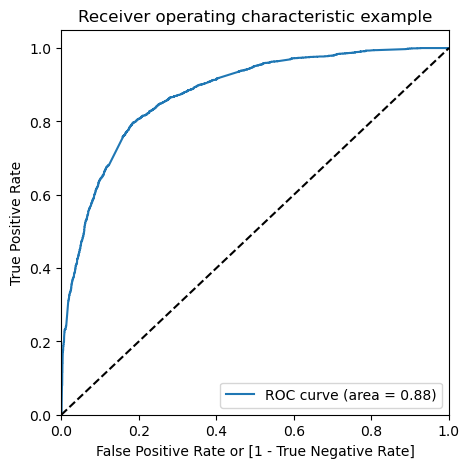

In [453]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)